# Casestudy MEL : DDA-TMT single cell melanoma data

This is case study DDA-TMT SCMS in  in this paper. The dataset is available at https://massive.ucsd.edu/ProteoSAFe/dataset.jsp?accession=MSV000089159. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import set_matplotlib_formats
from matplotlib.lines import Line2D
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.collections import LineCollection
import json
import scipy
import scipy.cluster.hierarchy as sch
import sys
import os
current_dir = os.getcwd()
sys.path.append(os.path.join(os.path.dirname(current_dir), 'code'))
from utility import show_protein_abundance_features
from makepkn import plot_indra
from evaluate import plot_corr
set_matplotlib_formats("svg")


/var/folders/sp/pn9txhp11mn2pyld318tpy080000gn/T/ipykernel_49592/953764087.py:21: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("svg")


The raw spectra were identified and quantified using MaxQuant. The resulting PSMs were than processed using the methods in MSstatsTMT, including normalization across TMT mixtures using a reference channel and summarization of peptide ions into a single value per protein per channel.

### Get pilot/historical data from past similar experiment

In [3]:
filepath = "../casestudy/MEL/data/meldataclean.csv" 
df = show_protein_abundance_features(filepath)
data = pd.read_csv(filepath)

First few rows of the protein abundance matrix:
   DHX15_HUMAN  G3P_HUMAN  HSPB1_HUMAN  ENOA_HUMAN  NPM_HUMAN  HS90A_HUMAN  \
0     9.368920  10.167968    11.777913   10.920721  10.906010    10.335122   
1     9.489853  10.180817    10.818609   10.871440  10.889861    10.396813   
2     9.766231  10.706837    11.750412   12.442845  12.427367    11.026080   
3    10.048671   9.803506    11.674774   11.818872  11.919689    10.957868   
4    10.155918  10.459226    12.510192   11.998972  11.544736    11.230470   

   HNRPC_HUMAN  HS90B_HUMAN  ANXA5_HUMAN  H14_HUMAN  ...  RS23_HUMAN  \
0    10.634692    11.553578     9.207920  11.360237  ...   11.271160   
1    10.330118    11.014594     9.597437  11.422972  ...   11.973722   
2    10.609098    11.076089    11.808549  11.638560  ...   11.030231   
3    10.552753    11.523332    11.582727  11.269536  ...   11.456930   
4    10.727446    11.372416    11.370214  11.708166  ...   11.388214   

   TYB10_HUMAN  RS4X_HUMAN   H4_HUMAN  RL23_HUMAN 

### Step2(optional): Prior Knowledge Network creation 


The figure below shows the prior knowledge network queried from INDRA. It comprises 1300 nodes, connected by a total of 6567 directed edges.

In [8]:
indra_file = "../casestudy/MEL/network/indra.tsv" 
plot_indra(indra_file)

INDRA data loaded successfully from ../casestudy/MEL/network/indra.tsv


The figure is combined graph obtained using combination of pkn from INDRA and  structure learning using PC algorithm

<div>
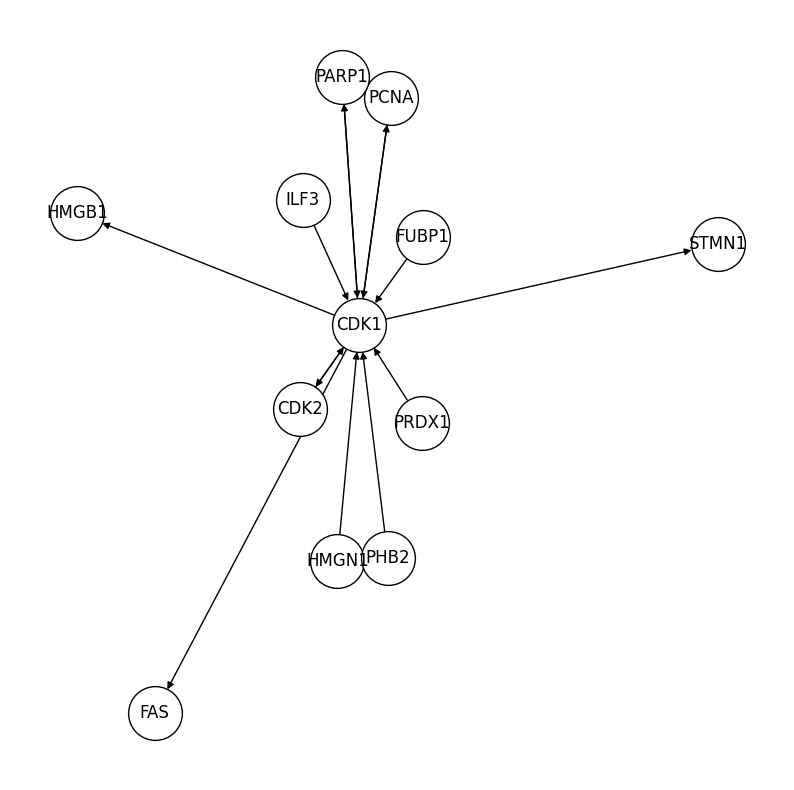
</div>


## Evaluation. Evaluating the realism of simulated data


#### Visual Metrics

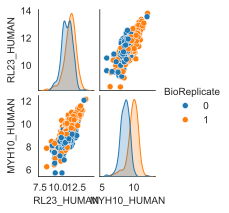

In [4]:
sns.set_style("white")
sns.pairplot(data[["RL23_HUMAN","MYH10_HUMAN","BioReplicate"]], hue="BioReplicate",height=1.5, aspect=0.8)

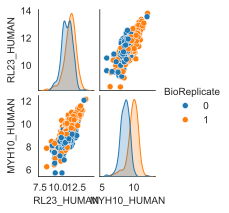

In [5]:
simpp0 = pd.read_csv('../casestudy/mel/perprotein/mel0_pp_0.csv')
simpp1 = pd.read_csv('../casestudy/mel/perprotein/mel1_pp_0.csv')
merged_df = pd.merge(simpp0, simpp1, how='outer', indicator=True)
merged_df['Condition'] = merged_df['_merge'].map({ 'left_only': 0, 'right_only': 1})
merged_df = merged_df.drop('_merge', axis=1)
sns.pairplot(data[["RL23_HUMAN","MYH10_HUMAN","BioReplicate"]], hue="BioReplicate",height=1.5, aspect=0.8)

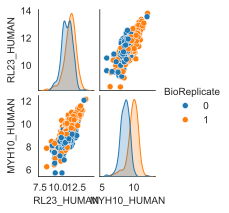

In [7]:
simtvae0 = pd.read_csv('../casestudy/mel/tvae/mel0_tvae_0.csv')
simtvae1 = pd.read_csv('../casestudy/mel/tvae/mel1_tvae_0.csv')
merged_df = pd.merge(simtvae0, simtvae1, how='outer', indicator=True)
merged_df['Condition'] = merged_df['_merge'].map({ 'left_only': 0, 'right_only': 1})
merged_df = merged_df.drop('_merge', axis=1)
sns.pairplot(data[["RL23_HUMAN","MYH10_HUMAN","BioReplicate"]], hue="BioReplicate",height=1.5, aspect=0.8)

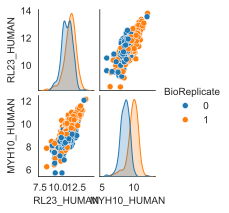

In [9]:
simco0 = pd.read_csv('../casestudy/mel/copula/mel_gm_copula_0.csv')
simco1 = pd.read_csv('../casestudy/mel/copula/mel1_gm_copula_0.csv')
merged_df = pd.merge(simco0, simco1, how='outer', indicator=True)
merged_df['Condition'] = merged_df['_merge'].map({ 'left_only': 0, 'right_only': 1})
merged_df = merged_df.drop('_merge', axis=1)
sns.pairplot(data[["RL23_HUMAN","MYH10_HUMAN","BioReplicate"]], hue="BioReplicate",height=1.5, aspect=0.8)


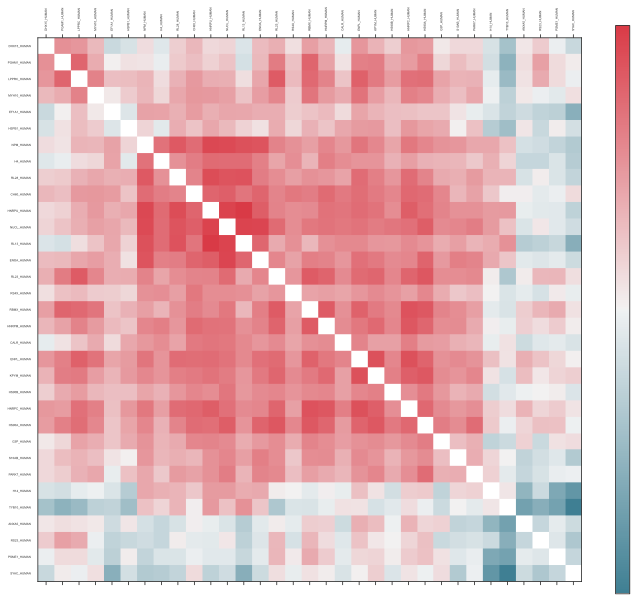

In [10]:
df = data
df_with_0 = df[df['BioReplicate'] == 0].drop(columns='BioReplicate')
df_with_1 = df[df['BioReplicate'] == 1].drop(columns='BioReplicate')
df = df_with_0
X = df.corr().values
X[np.isnan(X)]= 0
d = sch.distance.pdist(X)   
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
df = df.reindex(columns, axis=1)
plot_corr(df, size=10,font_scale=0.5)


#### Correlation for Per-protein healthy

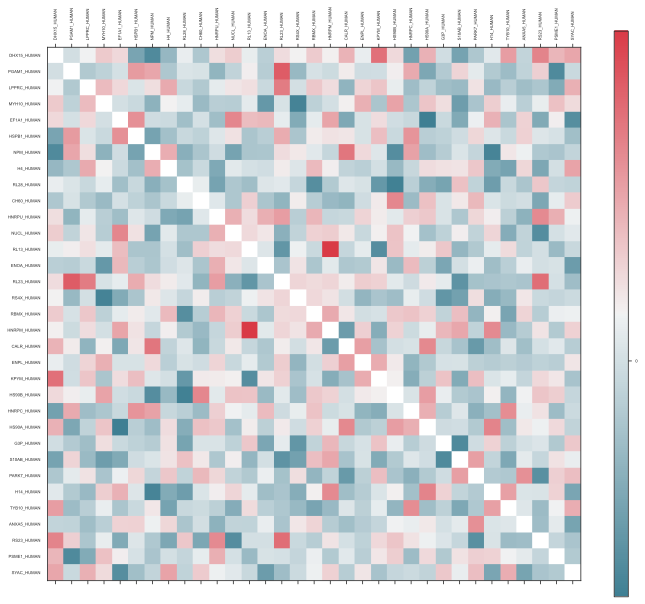

In [11]:
simpp0 = simpp0.reindex(columns, axis=1)
plot_corr(simpp0,size=10)

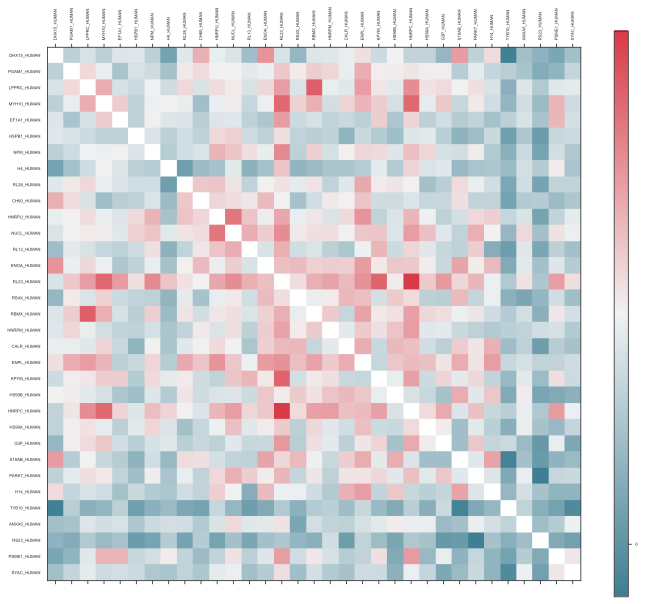

In [12]:
simtvae0 = simtvae0.reindex(columns, axis=1)
plot_corr(simtvae0,size=10)

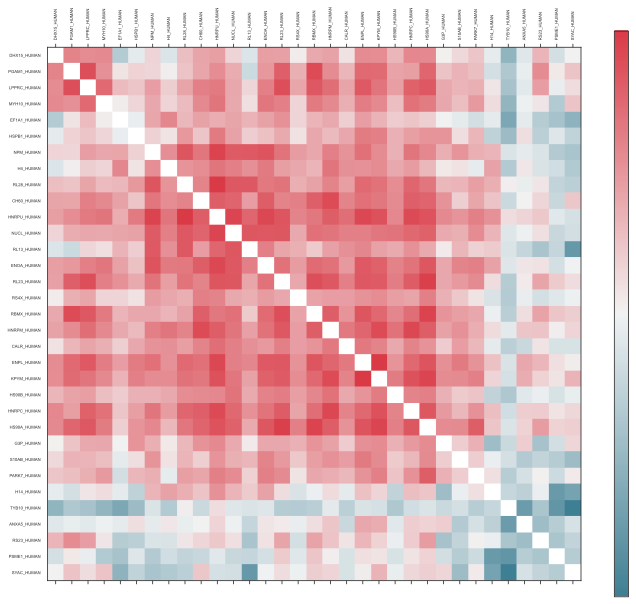

In [13]:
simco0 = simco0.reindex(columns, axis=1)
plot_corr(simco0,size=10)

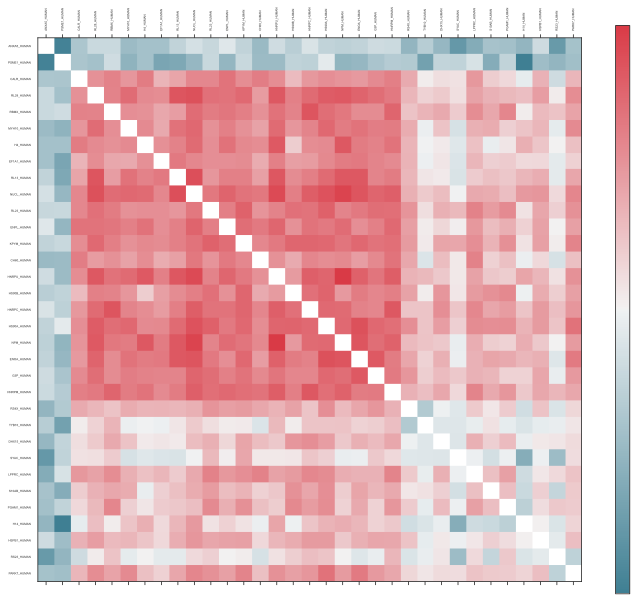

In [14]:
df = df_with_1
X = df.corr().values
X[np.isnan(X)]= 0
d = sch.distance.pdist(X)   
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
df = df.reindex(columns, axis=1)
plot_corr(df, size=10,font_scale=0.5)

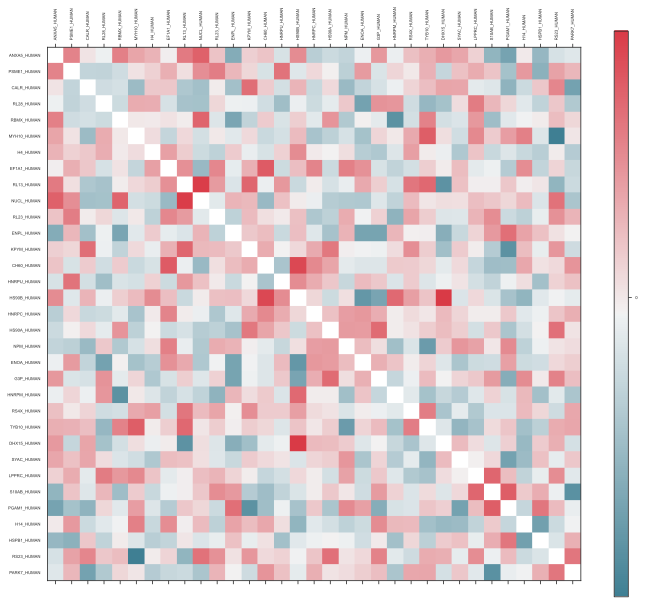

In [15]:
simpp1 = simpp1.reindex(columns, axis=1)
plot_corr(simpp1,size=10)

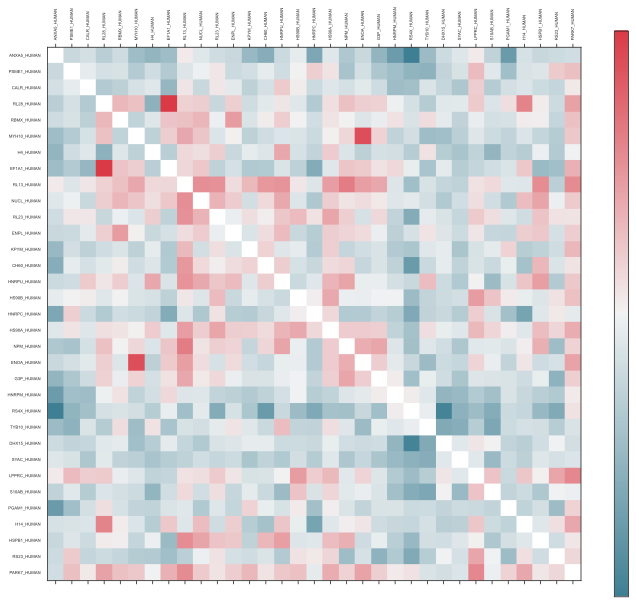

In [16]:
simtvae1 = simtvae1.reindex(columns, axis=1)
plot_corr(simtvae1,size=10)


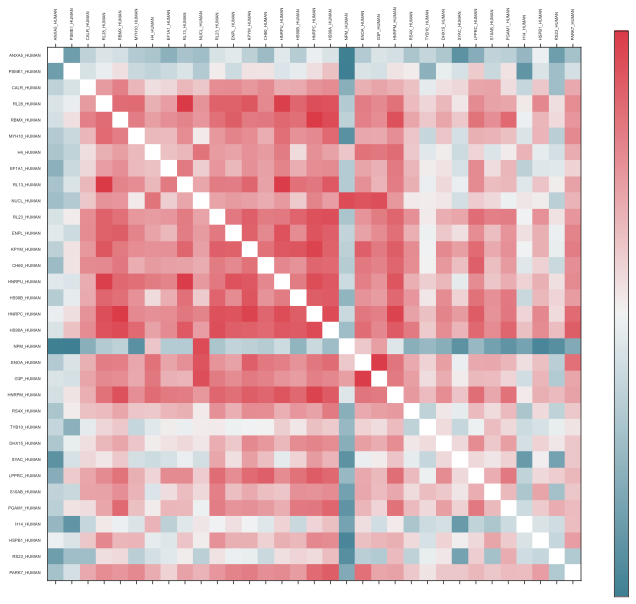

In [17]:
simco1 = simco1.reindex(columns, axis=1)
plot_corr(simco1,size=10)

##  Planning. Use simulations to plan future experiments

#### Class Prediction

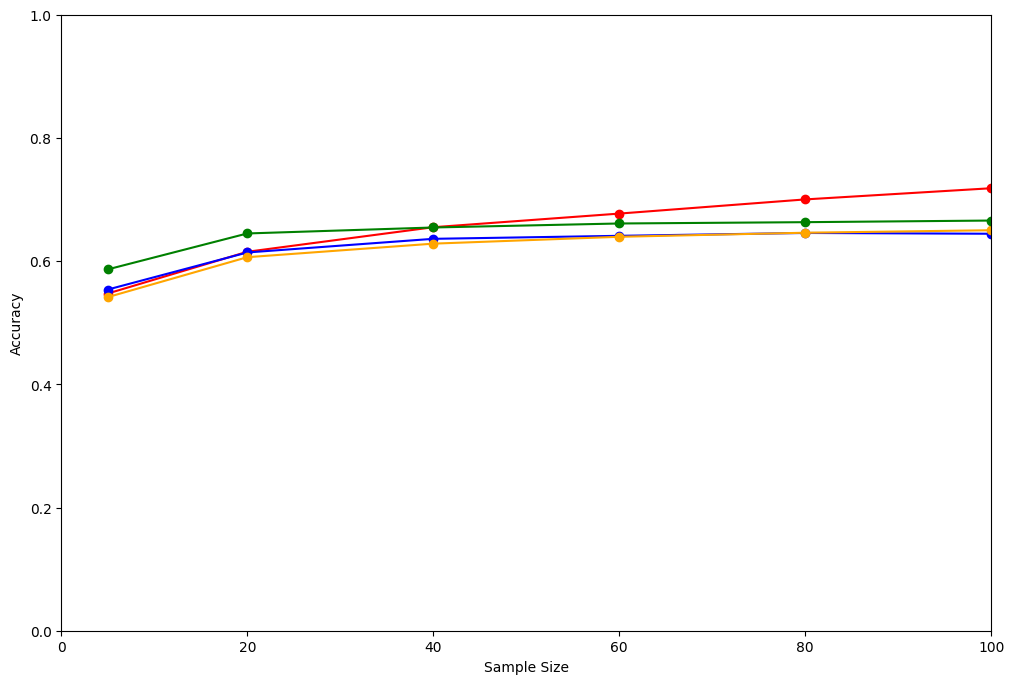

In [5]:
rfaccuracy = pd.read_csv('../casestudy/mel/melrfaccuracy.csv')

crc_data_val = rfaccuracy

font = {'weight' : 'bold',
        'size'   : 22}

# matplotlib.rc('font', **font)

plt.figure(figsize=(12, 8))
# Plot REAL
plt.plot(crc_data_val['Sample Size'], crc_data_val['Accuracy'],label='Experimental',marker='o', color='red')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['min'], crc_data_val['max'], color='red', alpha=0.3)


# Plot PP
plt.plot(crc_data_val['Sample Size'], crc_data_val['PP Accuracy'], label='PP',marker='o', color='blue')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['PP min'], crc_data_val['PP max'], color='blue', alpha=0.3)

# Plot CO
plt.plot(crc_data_val['Sample Size'], crc_data_val['CO Accuracy'], label='CO',marker='o', color='orange')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['CO min'], crc_data_val['CO max'], color='orange', alpha=0.3)


# Plot TVAE
plt.plot(crc_data_val['Sample Size'], crc_data_val['TVAE Accuracy'], label='TVAE',marker='o', color='green')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['TVAE min'], crc_data_val['TVAE max'], color='green', alpha=0.3)

# Labels and legend
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')

plt.ylim(0.0, 1.0)
plt.xlim(0,100)
plt.show()


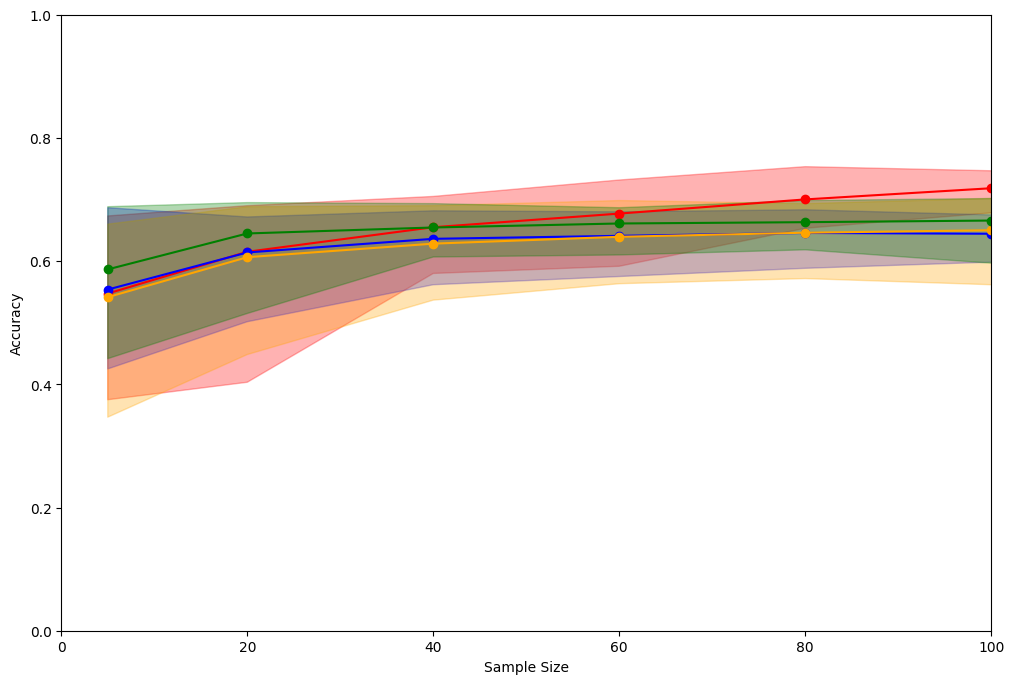

In [6]:
font = {'weight' : 'bold',
        'size'   : 22}

# matplotlib.rc('font', **font)

plt.figure(figsize=(12, 8))
# Plot REAL
plt.plot(crc_data_val['Sample Size'], crc_data_val['Accuracy'],label='Experimental',marker='o', color='red')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['min'], crc_data_val['max'], color='red', alpha=0.3)


# Plot PP
plt.plot(crc_data_val['Sample Size'], crc_data_val['PP Accuracy'], label='PP',marker='o', color='blue')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['PP min'], crc_data_val['PP max'], color='blue', alpha=0.3)

# Plot CO
plt.plot(crc_data_val['Sample Size'], crc_data_val['CO Accuracy'], label='CO',marker='o', color='orange')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['CO min'], crc_data_val['CO max'], color='orange', alpha=0.3)


# Plot TVAE
plt.plot(crc_data_val['Sample Size'], crc_data_val['TVAE Accuracy'], label='TVAE',marker='o', color='green')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['TVAE min'], crc_data_val['TVAE max'], color='green', alpha=0.3)

# Labels and legend
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xlim(0,100)
plt.show()


##### Class Discovery

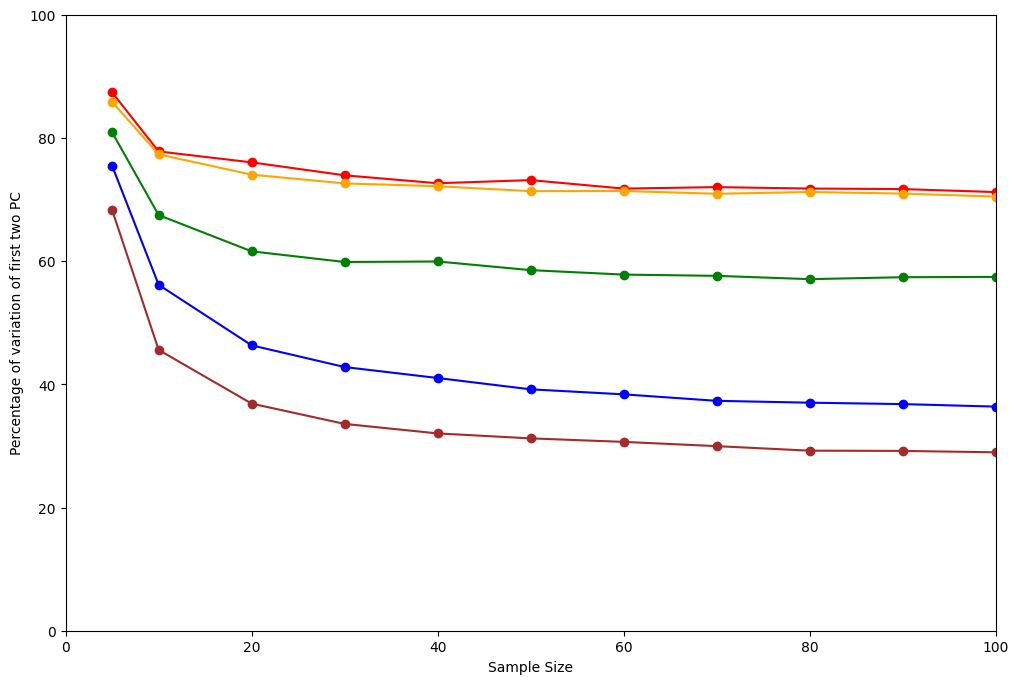

In [9]:
pcaaccuracy = pd.read_csv('../casestudy/mel/melpcanew.csv')
crc_data_val = pcaaccuracy

font = {'weight' : 'bold',
        'size'   : 22}


plt.figure(figsize=(12, 8))
# Plot REAL
plt.plot(crc_data_val['Sample Size'], crc_data_val['Accuracy'],label='Experimental Train',marker='o', color='red')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['min'], crc_data_val['max'], color='red', alpha=0.3)

plt.plot(crc_data_val['Sample Size'], crc_data_val['Accuracy v'],label='Experimental Validation',marker='o', color='brown')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['min v'], crc_data_val['max v'], color='brown', alpha=0.3)


# Plot PP
plt.plot(crc_data_val['Sample Size'], crc_data_val['PP Accuracy'], label='Per-Protein',marker='o', color='blue')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['PP min'], crc_data_val['PP max'], color='blue', alpha=0.3)

# Plot CO
plt.plot(crc_data_val['Sample Size'], crc_data_val['CO Accuracy'], label='Copula',marker='o', color='orange')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['CO min'], crc_data_val['CO max'], color='orange', alpha=0.3)


# Plot TVAE
plt.plot(crc_data_val['Sample Size'], crc_data_val['TVAE Accuracy'], label='TVAE',marker='o', color='green')
# plt.fill_between(crc_data_val['Sample Size'], crc_data_val['TVAE min'], crc_data_val['TVAE max'], color='green', alpha=0.3)

# Labels and legend
plt.xlabel('Sample Size')
plt.ylabel('Percentage of variation of first two PC')

plt.ylim(0, 100)
plt.xlim(0,100)
plt.show()


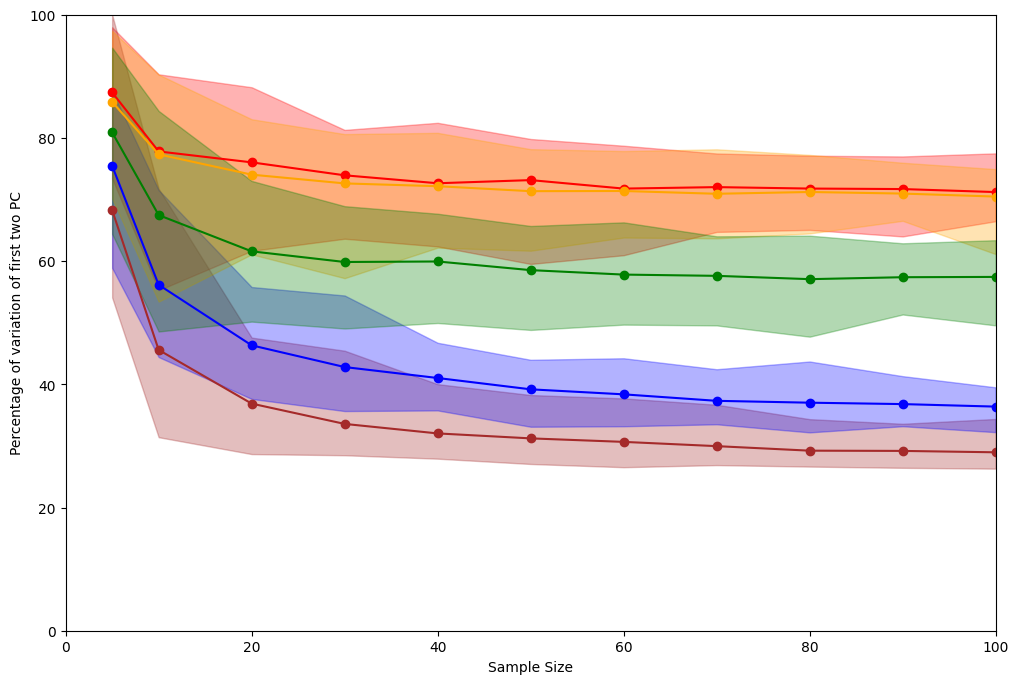

In [10]:

plt.figure(figsize=(12, 8))
# Plot REAL
plt.plot(crc_data_val['Sample Size'], crc_data_val['Accuracy'],label='Experimental Train',marker='o', color='red')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['min'], crc_data_val['max'], color='red', alpha=0.3)

plt.plot(crc_data_val['Sample Size'], crc_data_val['Accuracy v'],label='Experimental Validation',marker='o', color='brown')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['min v'], crc_data_val['max v'], color='brown', alpha=0.3)


# Plot PP
plt.plot(crc_data_val['Sample Size'], crc_data_val['PP Accuracy'], label='Per-Protein',marker='o', color='blue')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['PP min'], crc_data_val['PP max'], color='blue', alpha=0.3)

# Plot CO
plt.plot(crc_data_val['Sample Size'], crc_data_val['CO Accuracy'], label='Copula',marker='o', color='orange')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['CO min'], crc_data_val['CO max'], color='orange', alpha=0.3)


# Plot TVAE
plt.plot(crc_data_val['Sample Size'], crc_data_val['TVAE Accuracy'], label='TVAE',marker='o', color='green')
plt.fill_between(crc_data_val['Sample Size'], crc_data_val['TVAE min'], crc_data_val['TVAE max'], color='green', alpha=0.3)

# Labels and legend
plt.xlabel('Sample Size')
plt.ylabel('Percentage of variation of first two PC')

plt.ylim(0, 100)
plt.xlim(0,100)
plt.show()


##### Class Comparison

In [32]:
adjusted_p_values = {}
adjusted_p_values_pp = {}
adjusted_p_values_co = {}
adjusted_p_values_tvae = {}
dicts = {'real_adjust': adjusted_p_values, 'pp_adjust': adjusted_p_values_pp, 'co_adjust': adjusted_p_values_co, 'tvae_adjust': adjusted_p_values_tvae}  # Add more dictionaries as needed

# Load each JSON file and update the corresponding dictionary
for key, value in dicts.items():
    file_path = f'../casestudy/mel/pval/{key}.json'
    with open(file_path, 'r') as json_file:
        value.update(json.load(json_file))
sample_sizes=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

real = []
pp = []
co = []
tvae = []
realmin = []
realmax = []
ppmin = []
ppmax = []
comin = []
comax = []
tvaemin = []
tvaemax = []

col = 'TYB10_HUMAN'

cols = col
for s in sample_sizes:
    s = str(s)
    real.append(np.median(adjusted_p_values[s][col]))
    pp.append(np.median(adjusted_p_values_pp[s][col]))
    co.append(np.median(adjusted_p_values_co[s][col]))
    tvae.append(np.median(adjusted_p_values_tvae[s][col]))
    realmin.append(np.min(adjusted_p_values[s][col]))
    realmax.append(np.max(adjusted_p_values[s][col]))
    ppmin.append(np.min(adjusted_p_values_pp[s][col]))
    ppmax.append(np.max(adjusted_p_values_pp[s][col]))
    comin.append(np.min(adjusted_p_values_co[s][col]))
    comax.append(np.max(adjusted_p_values_co[s][col])) 
    tvaemin.append(np.min(adjusted_p_values_tvae[s][col]))
    tvaemax.append(np.max(adjusted_p_values_tvae[s][col]))

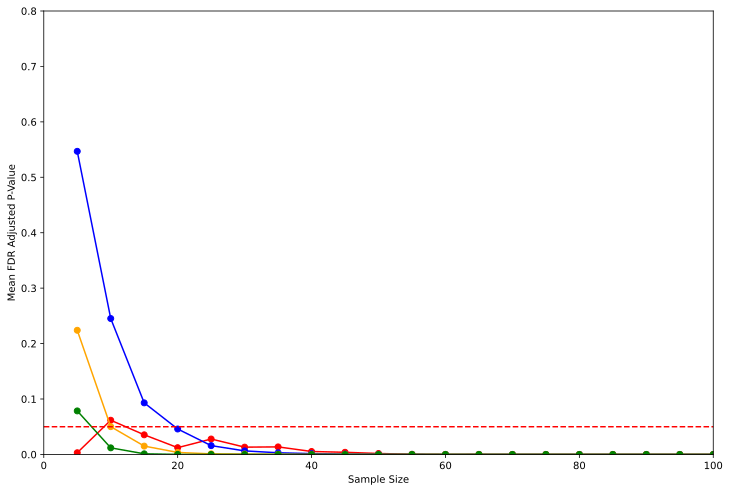

In [34]:
# Plot mean p-value vs sample size for each column
plt.figure(figsize=(12, 8))
font = {'weight' : 'bold',
        'size'   : 22}

plt.plot(sample_sizes, real, marker='o', label='Experimental', color='red', linestyle='-')
# plt.fill_between(sample_sizes, realmin, realmax, color='red', alpha=0.3)

plt.plot(sample_sizes, pp, marker='o', label='Per-Protein', color='blue', linestyle='-')
# plt.fill_between(sample_sizes, ppmin, ppmax, color='blue', alpha=0.3)

plt.plot(sample_sizes, co, marker='o', label='Copula', color='orange', linestyle='-')
# plt.fill_between(sample_sizes, comin, comax, color='orange', alpha=0.3)

plt.plot(sample_sizes, tvae, marker='o', label='TVAE', color='green', linestyle='-')
# plt.fill_between(sample_sizes, tvaemin, tvaemax, color='green', alpha=0.3)

plt.axhline(y=0.05, color='red', linestyle='--')

plt.xlabel('Sample Size')
plt.ylabel('Mean FDR Adjusted P-Value')
plt.ylim(0.0,0.8)
plt.xlim(0,100)
plt.show()

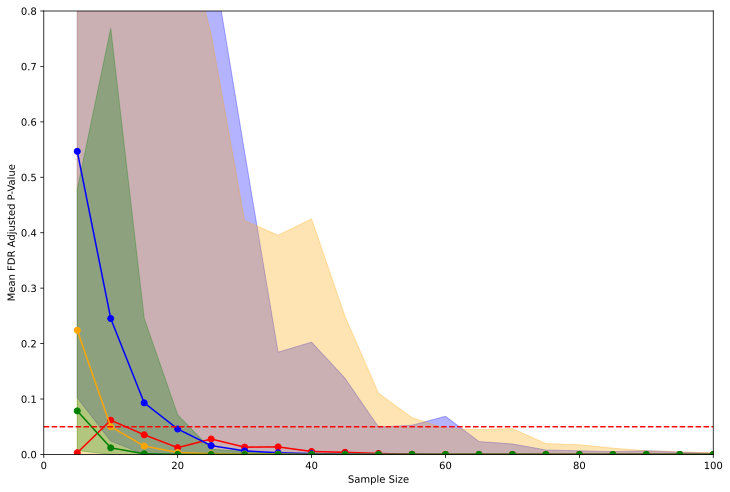

In [35]:
# Plot mean p-value vs sample size for each column
plt.figure(figsize=(12, 8))
font = {'weight' : 'bold',
        'size'   : 22}

plt.plot(sample_sizes, real, marker='o', label='Experimental', color='red', linestyle='-')
plt.fill_between(sample_sizes, realmin, realmax, color='red', alpha=0.3)

plt.plot(sample_sizes, pp, marker='o', label='Per-Protein', color='blue', linestyle='-')
plt.fill_between(sample_sizes, ppmin, ppmax, color='blue', alpha=0.3)

plt.plot(sample_sizes, co, marker='o', label='Copula', color='orange', linestyle='-')
plt.fill_between(sample_sizes, comin, comax, color='orange', alpha=0.3)

plt.plot(sample_sizes, tvae, marker='o', label='TVAE', color='green', linestyle='-')
plt.fill_between(sample_sizes, tvaemin, tvaemax, color='green', alpha=0.3)

plt.axhline(y=0.05, color='red', linestyle='--')

plt.xlabel('Sample Size')
plt.ylabel('Mean FDR Adjusted P-Value')
plt.ylim(0.0,0.8)
plt.xlim(0,100)
plt.show()